# First look
## 1) Plot data.  Will use IBM for easy reference
## 2) Linear Regression on Low
### Plot Actual value on Low Value on Low deviation back ground
## 3) Linear Regression, Low, Close up
## 4) Liner Regression, Low/High
## 5) Rolling Values
## ---------------------------------------------------------------





## 1) Plot data.  Will use IBM for easy reference

Plot Actual data for IBM Stock High/Low
      date_ordinal    open   close   volume       low    high
1251        737417  109.90  107.57  3821376  107.5000  111.00
1252        737419  108.00  111.39  6645794  105.9400  111.39
1253        737420  109.99  113.78  6045590  109.4699  113.78
1254        737421  114.22  113.03  5117533  112.5000  114.80
1255        737424  113.33  113.67  4982755  112.4201  114.35


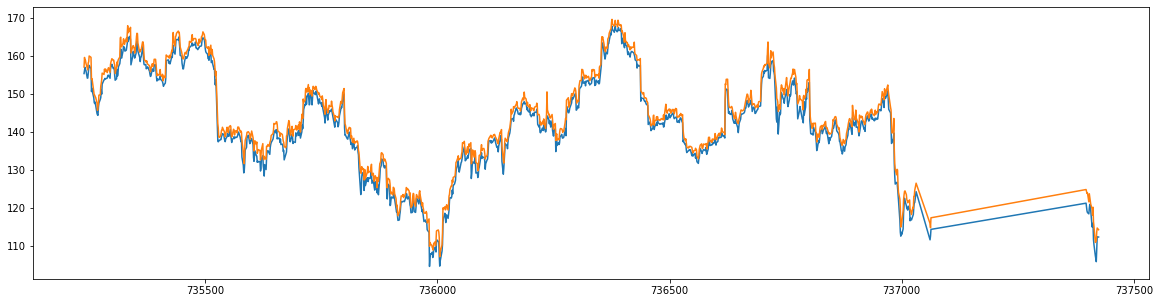

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib widget for Jupiter lab...

plt.rcParams['figure.figsize'] = [20, 5]# width, height in inches

from sklearn.linear_model import LinearRegression

df = pd.read_csv('D:/data/stocks/ixtradingChart_5y/ibm.csv', index_col=0)

print("Plot Actual data for IBM Stock High/Low")

df = df.sort_values('date_ordinal')
print(df.tail())

plt.plot(df['date_ordinal'].values, df['low'].values)
plt.plot(df['date_ordinal'].values, df['high'].values)
plt.show()

## 2) Linear Regression on Low
### Plot Actual value on Low Value on Low deviation back ground

error 3.888534022241563
[112.92175847 112.38180873 113.03255285]
error % 3.443564885127078
error 3.888534022241563


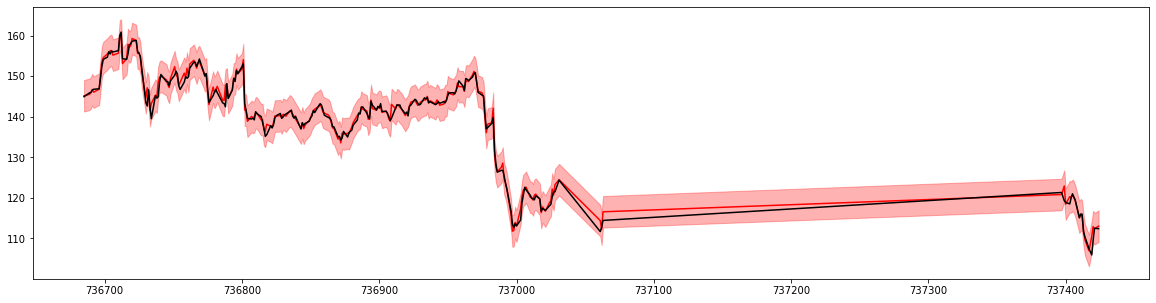

In [2]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

modelLow = LinearRegression()

# ------ divide data into training and testing
X_train = df.values[:1000]
y_train = df['low'].values[1:1001]
modelLow.fit(X_train, y_train)
X_test = df.values[1000:]
y_test = df['low'].values[1001:]

#------ Predict Low value
predLow = modelLow.predict(X_test)

# ----------- Compute Error of Low value
msError = mean_squared_error(y_test , predLow[:-1])
print('error', msError)
print(predLow[-3:])
print('error %', 100*msError/predLow[-3])
print('error', msError)

# Plot Low value Predicted highlighted in back ground with error
xAxis = df['date_ordinal'].values[1000:]
y1 = predLow + msError
y2 = predLow - msError
plt.fill_between(xAxis, y1, y2, alpha=.3, color='red')
plt.plot(xAxis, predLow, c='red')
plt.plot(xAxis, df['low'].values[1000:], c='black')

plt.show()



## 3) Linear Regression, Low, Close up

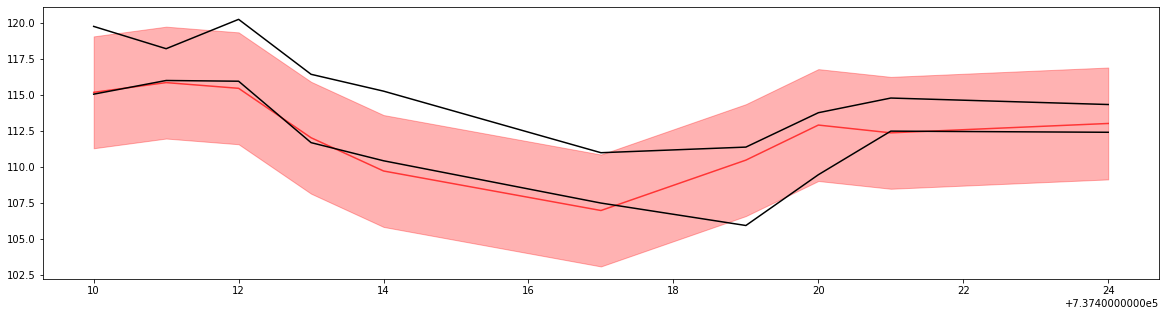

In [3]:
# ============ Narrow down and zoom in on last part of data for better view
viewLast = 10
xAxis = df['date_ordinal'].values[-viewLast:]
y1 = predLow[-viewLast:] + msError
y2 = predLow[-viewLast:] - msError
plt.fill_between(xAxis, y1, y2, alpha=.3, color='red')
plt.plot(xAxis, predLow[-viewLast:], c='red', alpha=.7)
plt.plot(xAxis, df['low'].values[-viewLast:], c='black')

plt.plot(xAxis, df['high'].values[-viewLast:], c='black')

plt.show()




## 4) Liner Regression, Low/High

Black lines show actual high/low
Blue is predicted High
Red is predicted Low
Red/Blue background is error


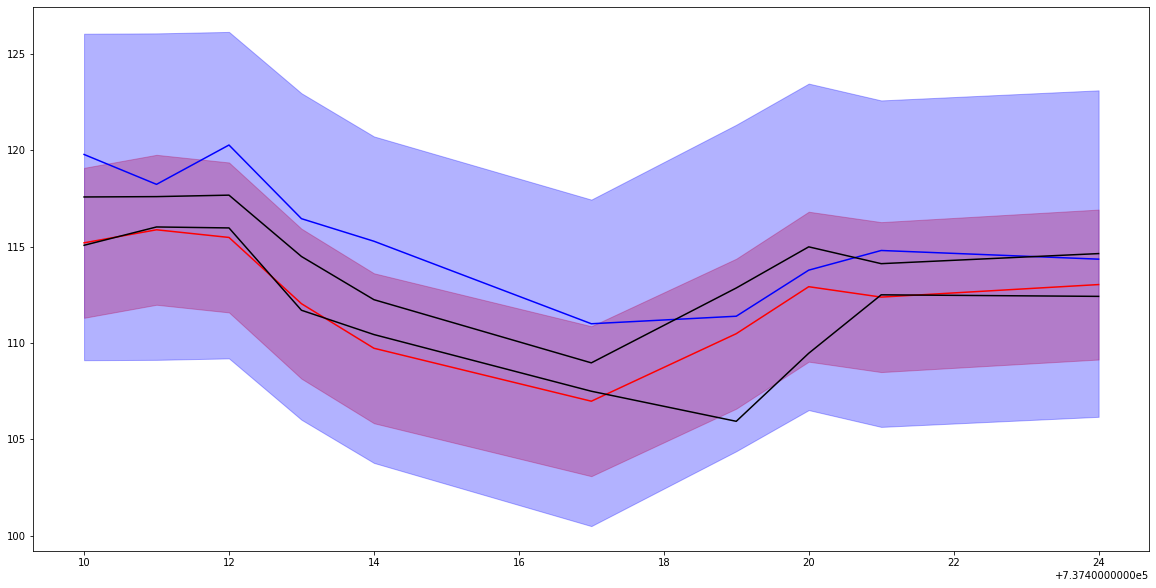

In [4]:
# ========== Show both high/low predictions overlapping

# ---------------- Create and Train model for high values.  Generate Error
modelH = LinearRegression()

XH_train = df.values[:1000]
yH_train = df['high'].values[1:1001]
modelH.fit(XH_train, yH_train)
XH_test = df.values[1000:]
yH_test = df['high'].values[1001:]
predHigh = modelH.predict(XH_test)

msErrorH = mean_squared_error(y_test , predHigh[:-1])

# =====  Using pridiction Low from Above, plot both so can compare
print("Black lines show actual high/low")
print("Blue is predicted High")
print("Red is predicted Low")
print("Red/Blue background is error")

viewLast = 10

plt.rcParams['figure.figsize'] = [20, 10]# width, height in inches
xAxis = df['date_ordinal'].values[-viewLast:] # 

# ----- fill error for Low in red
y1 = predLow[-viewLast:] + msError
y2 = predLow[-viewLast:] - msError
plt.fill_between(xAxis, y1, y2, alpha=.3, color='red')

# ----- fill error for high in blue
y1 = predHigh[-viewLast:] + msErrorH
y2 = predHigh[-viewLast:] - msErrorH
plt.fill_between(xAxis, y1, y2, alpha=.3, color='blue')

# -------- plot predicted values in  red and blue
plt.plot(xAxis, predLow[-viewLast:], c='red') # , alpha=.7
plt.plot(xAxis, df['high'].values[-viewLast:], c='blue')

# ------- plot actual values in black
plt.plot(xAxis, df['low'].values[-viewLast:], c='black')
plt.plot(xAxis, predHigh[-viewLast:], c='black') # , alpha=.7

plt.show()

## 5) Rolling Values
### One common practiceis to average values over a period, looking at long term predictions

   date_ordinal      open     close   volume       low      high
0        735239  156.9769  156.0123  4068105  155.4252  157.1489
1        735240  156.3394  159.1242  5934322  156.3311  159.6610
2        735241  158.8054  157.6647  4604105  157.0692  158.8788
3        735242  158.5454  157.1698  4322284  156.4736  158.9480
4        735243  157.9499  157.0692  4023089  156.2472  158.1680

(1210, 3) (1210,) (1210,)
(10, 3) (10,) (10,)



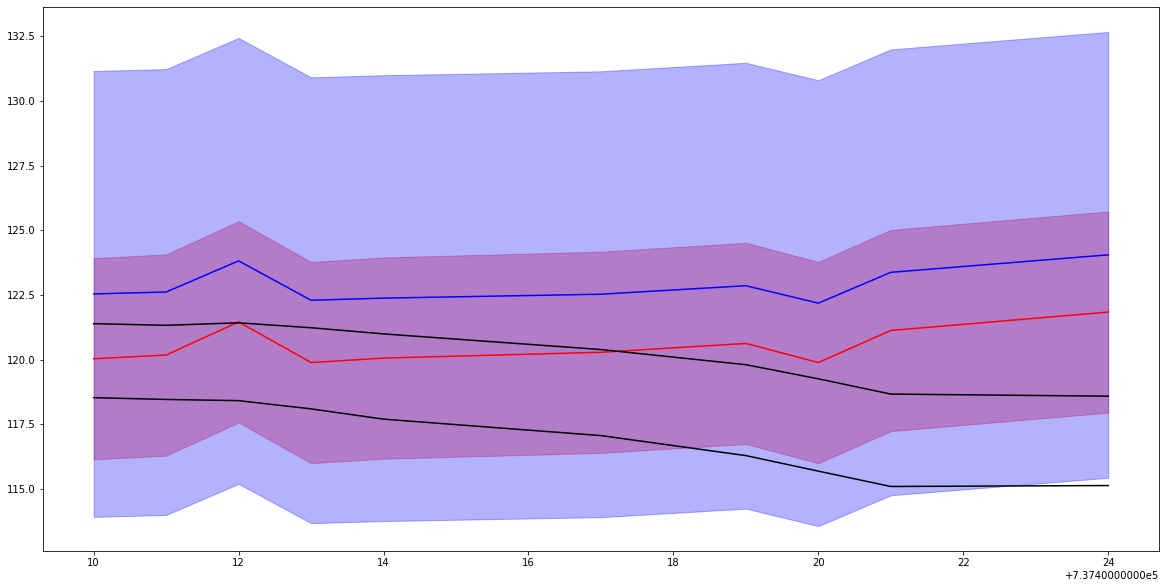

In [5]:
# working with rolling window of data.

# reload because redoes calculations
df = pd.read_csv('D:/data/stocks/ixtradingChart_5y/ibm.csv', index_col=0)
df = df.sort_values('date_ordinal')

windowSize = 20
predUpTo = -10 # matches above

print(df.head())
print()

# rolling windows has to be .mean() .median() .max()  .min()

df['winLow']=df['low']
df['winLow']=df['low'].rolling(windowSize).mean()
df['winHigh']=df['high']
df['winHigh']=df['winHigh'].rolling(windowSize).mean()
df = df.dropna()

X_train = df.iloc[:predUpTo-windowSize][['winHigh','winLow','volume']]
y_train_low = df.iloc[windowSize:predUpTo]['winLow']
y_train_high = df.iloc[windowSize:predUpTo]['winHigh']
print(np.shape(X_train), np.shape(y_train_low), np.shape(y_train_high))

X_test = df.iloc[predUpTo-windowSize:-windowSize][['winHigh','winLow','volume']]
y_test_low = df.iloc[predUpTo:]['winLow']
y_test_high = df.iloc[predUpTo:]['winHigh']
print(np.shape(X_test), np.shape(y_test_low), np.shape(y_test_high))
print()

modelLow = LinearRegression()
modelHigh = LinearRegression()

modelLow.fit(X_train.values, y_train_low)
modelHigh.fit(X_train.values, y_train_high)

predLow = modelLow.predict(X_test.values)
predHigh = modelHigh.predict(X_test.values)

msErrorL = mean_squared_error(y_test_low , predLow)
msErrorH = mean_squared_error(y_test_high , predHigh)
print("=========")

viewLast = -predUpTo # !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

plt.rcParams['figure.figsize'] = [20, 10]# width, height in inches
xAxis = df.iloc[predUpTo:]['date_ordinal'].values 

# ----- fill error for Low in red
y1 = predLow[-viewLast:] + msError
y2 = predLow[-viewLast:] - msError
plt.fill_between(xAxis, y1, y2, alpha=.3, color='red')

# ----- fill error for high in blue
y1 = predHigh[-viewLast:] + msErrorH
y2 = predHigh[-viewLast:] - msErrorH
plt.fill_between(xAxis, y1, y2, alpha=.3, color='blue')

# -------- plot predicted values in  red and blue
plt.plot(xAxis, predLow, c='red') # , alpha=.7
plt.plot(xAxis, predHigh, c='blue')

# ------- plot actual values in black
plt.plot(xAxis, y_test_low, c='black')
plt.plot(xAxis, y_test_high, c='black')

plt.show()

In [6]:
# how far into the future can we go???????